In [1]:
#IMPORTANDO BIBLIOTECAS IMPORTANTES
import numpy as np
from math import atan
from math import cos
from math import sqrt
from math import sin
from math import acos
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interactive
from IPython.display import Image as img
from Modules.Read_Office import xlsread 
from Modules.Sama_Irai import calang,caldist

In [8]:
#DEFININDO O VETOR DE LATITUDE E LONGITUDE:
lat = []
long = []
nT = []
for coluna in xlsread('Isofotas.xls',0):
    lat.append(coluna[0])
    long.append(coluna[1])
    nT.append(coluna[8])
lat.remove('Lat')
long.remove('Long')
nT.remove('F')
dat = (long,lat,nT)

-49.0


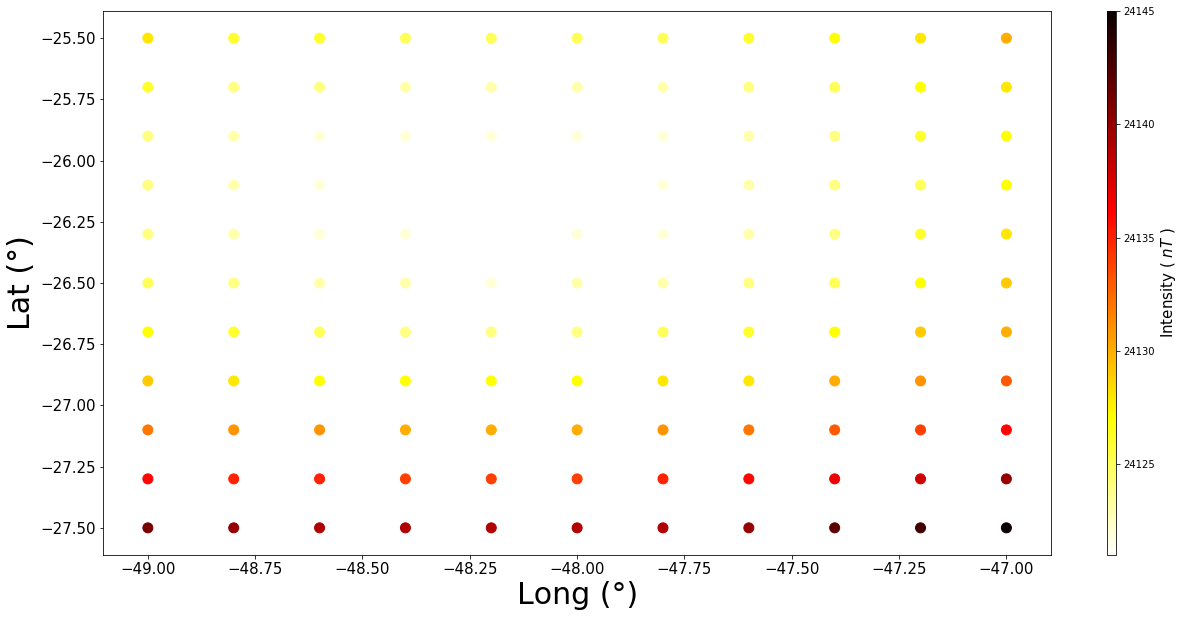

In [22]:
plt.figure(figsize=(20,10))
plt.xlabel('Long (°)', fontsize=30)
plt.ylabel('Lat (°)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim(np.min(long), np.max(long))
#plt.ylim(np.min(lat), np.max(lat))
#plt.scatter(long,lat,nT,marker = '.')
p1 = plt.scatter(long, lat, s=100.0, c=nT, cmap='hot_r')
cbar = plt.colorbar(p1, aspect = 60, fraction = 0.1, orientation="vertical")
cbar.set_label('Intensity ( $ nT $ )',fontsize=15, rotation = 90)
plt.show()

In [21]:
x,y = np.meshgrid(long,lat)
def f(lat,long):
    c = 0
    for coluna in xlsread('Isofotas.xls',0):
        for i in range(1,122):
            if coluna[1][i] == lat:
                z = coluna[8][i]
    return z
z = []
for i in range(122):
    z.append(f(lat[i],long[i]))
#sns.heatmap(nT)

IndexError: string index out of range